In [12]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [13]:
def tw(R,Q,mu):
    return 4*Q*mu/(np.pi*R**3)

def p(R,Q,mu,pl,z):
    return pl+8*mu*Q/(np.pi*R**4)*(l-z)

def v(R,Q):
    return np.sqrt(8*1.0/15)*2*Q/(np.pi*R**2)

In [14]:
N = 500
mur = 0.25
sigr = 0.0075

mu = 0.04
Q  = 100
pl = 80*1333
l  = 100


R = mur + np.random.randn(N)*sigr

329.14776823137726
30.53330176614003
0.09276472366866052


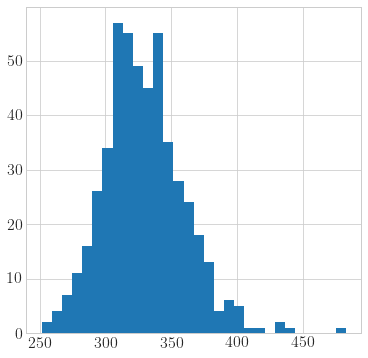

In [15]:
TW = tw(R,Q,mu)

print(np.mean(TW))
print(np.std(TW))
print(np.std(TW)/np.mean(TW))

plt.figure(figsize=(6,6))
plt.hist(TW,bins=30)
plt.show()

278.55736679009897
24.726729812177332
0.08876710064110291


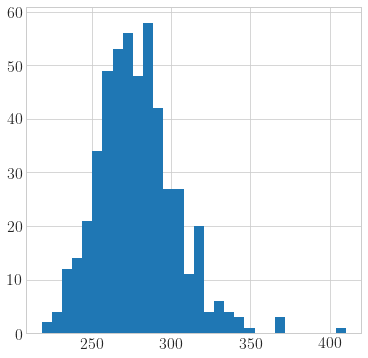

In [16]:
P = p(R,Q,mu,pl,0)/1333

print(np.mean(P))
print(np.std(P))
print(np.std(P)/np.mean(P))

plt.figure(figsize=(6,6))
plt.hist(P,bins=30)
plt.show()

89.92786833950494
1.2363364906088667
0.013748090702443008


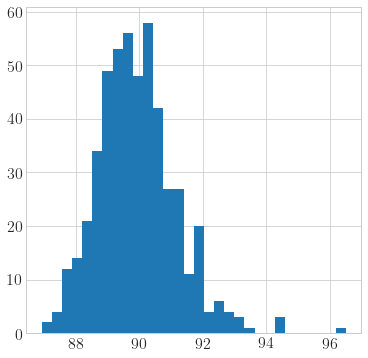

In [17]:
P = p(R,Q,mu,pl,l*0.95)/1333

print(np.mean(P))
print(np.std(P))
print(np.std(P)/np.mean(P))

plt.figure(figsize=(6,6))
plt.hist(P,bins=30)
plt.show()

748.0288017813813
45.98789189182453
0.061478771649310024


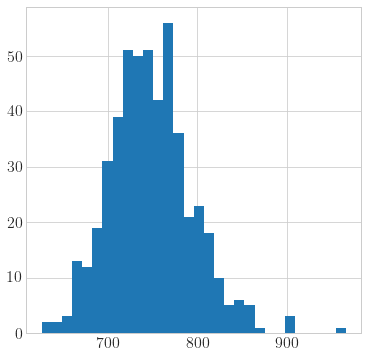

In [18]:
V = v(R,Q)

print(np.mean(V))
print(np.std(V))
print(np.std(V)/np.mean(V))

plt.figure(figsize=(6,6))
plt.hist(V,bins=30)
plt.show()

In [19]:
Rmat = [0.1,0.25,0.5,1.0,2.0]

rows = []
for mur in Rmat:
    R = mur + np.random.randn(N)*sigr
    
    cv_r = sigr/mur
    
    TW = tw(R,Q,mu)
    cv_t = np.std(TW)/np.mean(TW)

    P = p(R,Q,mu,pl,0)/1333
    cv_pin = np.std(P)/np.mean(P)

    P = p(R,Q,mu,pl,l*0.9)/1333
    cv_pout = np.std(P)/np.mean(P)

    V = v(R,Q)
    cv_v = np.std(V)/np.mean(V)
    
    rows.append({
        "R":mur,
        "cv_r":cv_r,
        "cv_t":cv_t,
        "cv_pin":cv_pin,
        "cv_pout":cv_pout,
        "cv_v":cv_v
    })
    
df = pd.DataFrame(rows)

In [20]:
print(df[['R','cv_r','cv_pin','cv_pout','cv_t','cv_v']])

      R     cv_r    cv_pin       cv_pout      cv_t      cv_v
0  0.10  0.07500  0.306660  2.810132e-01  0.228489  0.150264
1  0.25  0.03000  0.084106  2.336341e-02  0.088123  0.058399
2  0.50  0.01500  0.007842  8.904544e-04  0.044320  0.029521
3  1.00  0.00750  0.000293  2.950806e-05  0.023155  0.015437
4  2.00  0.00375  0.000009  9.044871e-07  0.011364  0.007580


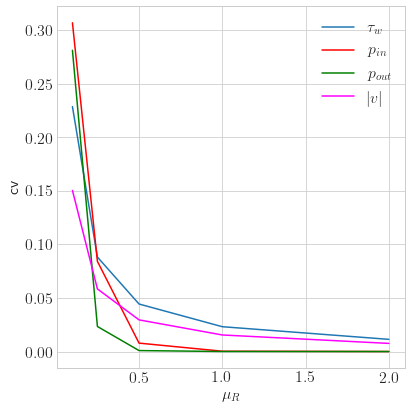

In [21]:
plt.figure(figsize=(6,6))

plt.plot(df['R'],df['cv_t'],label=r'$\tau_w$')
plt.plot(df['R'],df['cv_pin'],label=r'$p_{in}$', color='r')
plt.plot(df['R'],df['cv_pout'],label=r'$p_{out}$', color='g')
plt.plot(df['R'],df['cv_v'],label=r'$|v|$', color='magenta')

plt.xlabel('$\mu_R$')
plt.ylabel('cv')
plt.legend()

plt.tight_layout()
plt.savefig('poiseulle.png',dpi=300)
plt.savefig('poiseulle.pdf',dpi=300)

plt.show()
plt.close()

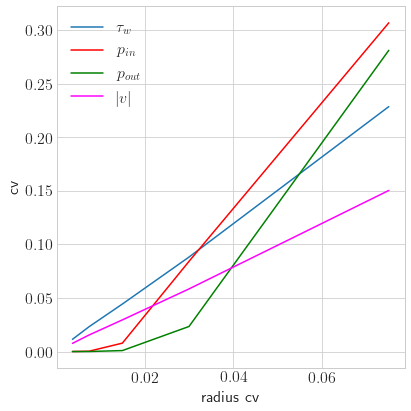

In [22]:
plt.figure(figsize=(6,6))

plt.plot(df['cv_r'],df['cv_t'],label=r'$\tau_w$')
plt.plot(df['cv_r'],df['cv_pin'],label=r'$p_{in}$', color='r')
plt.plot(df['cv_r'],df['cv_pout'],label=r'$p_{out}$', color='g')
plt.plot(df['cv_r'],df['cv_v'],label=r'$|v|$', color='magenta')

plt.xlabel('radius cv')
plt.ylabel('cv')
plt.legend()

plt.tight_layout()
plt.savefig('poiseulle_cv.png',dpi=300)
plt.savefig('poiseulle_cv.pdf',dpi=300)

plt.show()
plt.close()